# Project 3: Chess Dataset Analysis

# Data Cleansing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
chess_df = pd.read_csv("games.csv")
chess_df.pop('created_at')
chess_df.pop('last_move_at')
chess_df.pop('id')
chess_df.pop('increment_code')
chess_df.pop('white_id')
chess_df.pop('black_id')
chess_df.pop('moves')
chess_df.pop('opening_eco')
chess_df.pop('opening_name')
chess_df.pop('opening_ply')
chess_df.head()

,rated,turns,victory_status,winner,white_rating,black_rating
0,False,13,outoftime,white,1500,1191
1,True,16,resign,black,1322,1261
2,True,61,mate,white,1496,1500
3,True,61,mate,white,1439,1454
4,True,95,mate,white,1523,1469


# Part 1

<AxesSubplot:>

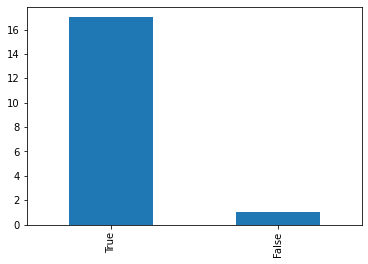

In [3]:
df_rated, df_unrated = [x for _, x in chess_df.groupby(chess_df['rated'] == False)]
df_unrated['Rating Difference'] = df_unrated.apply(lambda row: abs(row['white_rating'] - row['black_rating']), axis = 1)
df_unrated['Higher Rated Player'] = np.where(df_unrated['white_rating'] > df_unrated['black_rating'], True, False)
df_unrated['Higher Rated Player'] = df_unrated['Higher Rated Player'].replace(True, 'white', regex=True)
df_unrated['Higher Rated Player'] = df_unrated['Higher Rated Player'].replace(False, 'black', regex=True)
df_unrated['Higher Rated Player Won'] = np.where(df_unrated['winner'] == df_unrated['Higher Rated Player'], True, False)

df_unrated.pop('rated')
#We removed all draws here:
draw_rows = df_unrated[df_unrated['winner'] == 'draw'].index
df_unrated.drop(draw_rows, inplace = True)
df_unrated.drop(df_unrated[df_unrated['Rating Difference'] == 0].index, inplace = True)
dfleft, df1 = [x for _, x in df_unrated.groupby(df_unrated['Rating Difference'] < 401)]
#Here df1 holds all games where the rating difference is sub 400
dfleft, df2 = [x for _, x in dfleft.groupby(dfleft['Rating Difference'] < 802)]
#Here df2 holds all games where the rating difference is greater than 401 and less than 802
dfleft, df3 = [x for _, x in dfleft.groupby(dfleft['Rating Difference'] < 1203)]
#Here df3 holds all games where the rating difference is greater than 802 and less than 1203
df4 = dfleft
#Here df4 holds all games where the rating difference is greater than 1203 which is the max we are going to partion from
df4_temp = (df4['Higher Rated Player Won'].value_counts())
df4_temp.plot.bar(y = df4_temp[1])


<AxesSubplot:>

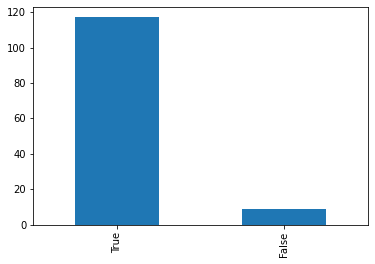

In [4]:
df3_temp = (df3['Higher Rated Player Won'].value_counts())
df3_temp.plot.bar(y = df3_temp[1])

<AxesSubplot:>

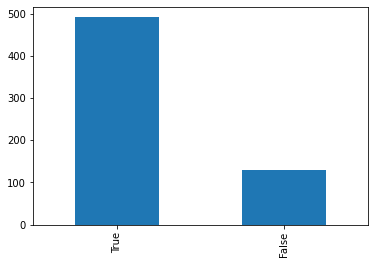

In [5]:
df2_temp = (df2['Higher Rated Player Won'].value_counts())
df2_temp.plot.bar(y = df2_temp[1])

<AxesSubplot:>

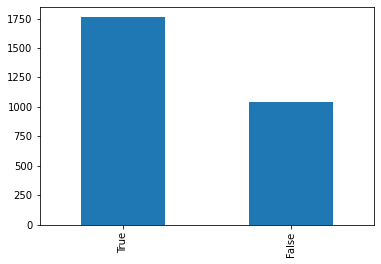

In [6]:
df1_temp = (df1['Higher Rated Player Won'].value_counts())
df1_temp.plot.bar(y = df1_temp[1])

# Part 2

In [7]:
df_rated['Rating Avg'] = df_rated.apply(lambda row: abs((row['white_rating'] + row['black_rating'])/2), axis = 1)
dftest = df_rated[['turns', 'Rating Avg']]

In [8]:

dfsplit = dftest.sample(n=200)
#Taking 200 random data points

X_train = df_rated[["Rating Avg"]]
X_test = dfsplit[["Rating Avg"]]
y_train = df_rated["turns"]
y_test = dfsplit["turns"]


forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))

23.421687759771533


In [9]:
print(forest_model.predict([[2200.0]]))

[89.655]


# Part 3

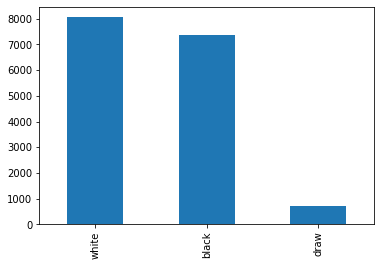

In [10]:
df1_test = (df_rated['winner'].value_counts())
df1_test.plot.bar(y = df1_test[1])
dfr1, dfr2 = [x for _, x in df_rated.groupby(df_rated['Rating Avg'] < 1600)]
#dfr1 is games above 1600, dfr2 is games below 1600

<AxesSubplot:>

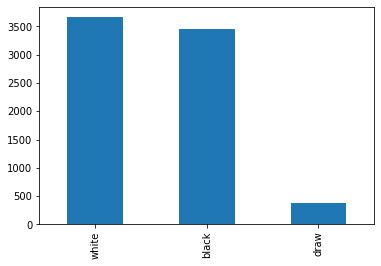

In [11]:
dfr1_temp = (dfr1['winner'].value_counts())
dfr1_temp.plot.bar(y = dfr1_temp[1])

<AxesSubplot:>

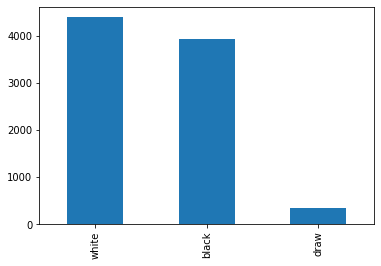

In [12]:
dfr2_temp = (dfr2['winner'].value_counts())
dfr2_temp.plot.bar(y = dfr2_temp[1])

# Part 4

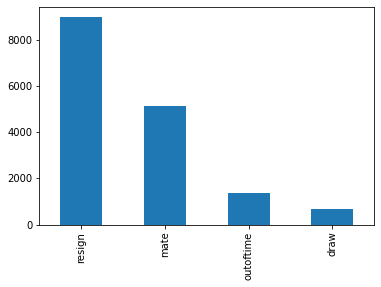

In [13]:
df1_test = (df_rated['victory_status'].value_counts())
df1_test.plot.bar(y = df1_test[1])
dft1, dft2 = [x for _, x in df_rated.groupby(df_rated['Rating Avg'] < 1600)]

<AxesSubplot:>

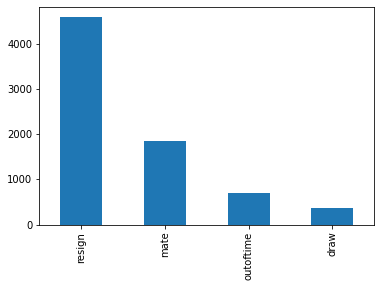

In [14]:
dfr1_temp = (dfr1['victory_status'].value_counts())
dfr1_temp.plot.bar(y = dfr1_temp[1])

<AxesSubplot:>

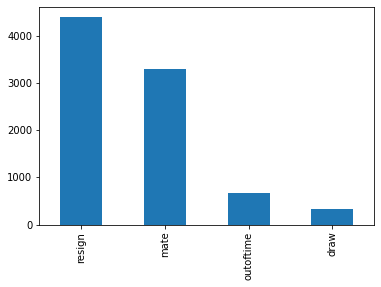

In [15]:
dfr2_temp = (dfr2['victory_status'].value_counts())
dfr2_temp.plot.bar(y = dfr2_temp[1])

This concludes the lab.